In [1]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import  re
import os 
import codecs
from sklearn import feature_extraction
import mpld3

In [8]:
review = open('../US.20171130.txt').read().split(','+'\"')

In [10]:
type(review)

list

In [34]:
# 载入 nltk 的英文停用词作为“stopwords”变量
stopwords = nltk.corpus.stopwords.words('english')
print (stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


In [35]:
# 载入 nltk 的 SnowballStemmer 作为“stemmer”变量(把一些動詞形式轉換成原型)
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [25]:
for i in review:
    text =nltk.word_tokenize(i)
    fdist1 = nltk.FreqDist(text)
    text.append(fdist1)
print(fdist1)

<FreqDist with 99 samples and 176 outcomes>


In [31]:
fdist1.most_common(50)

[('.', 9),
 ('for', 8),
 (',', 8),
 ('and', 7),
 ('!', 7),
 ('it', 6),
 ('I', 5),
 ('a', 5),
 ('bought', 3),
 ('son', 3),
 ("'s", 3),
 ('the', 3),
 ('gift', 3),
 ('cute', 3),
 ('this', 2),
 ('he', 2),
 ('The', 2),
 ('well', 2),
 ('happy', 2),
 ('Super', 2),
 ('loved', 2),
 ('pokemon', 2),
 ('fan', 2),
 ('seems', 2),
 ('to', 2),
 ('really', 2),
 ('is', 2),
 ('Pokemon', 2),
 ('It', 2),
 ('good', 2),
 ('quality', 2),
 ('My', 2),
 ('my', 1),
 ('Christmas', 1),
 ('obsessed', 1),
 ('with', 1),
 ('Pokéball', 1),
 ('Pikachu', 1),
 ('are', 1),
 ('both', 1),
 ('very', 1),
 ('made', 1),
 ('If', 1),
 ("'m", 1),
 ('``', 1),
 ('adorable', 1),
 ('pics', 1),
 ('description', 1),
 ('were', 1),
 ('spot', 1)]

In [32]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:50]

['I',
 'bought',
 'this',
 'for',
 'my',
 'son',
 'Christmas',
 'and',
 'he',
 "'s",
 'obsessed',
 'with',
 'it',
 '.',
 'The',
 'Pokéball',
 'Pikachu',
 'are',
 'both',
 'very',
 'well',
 'made',
 'If',
 'happy',
 ',',
 "'m",
 '``',
 'Super',
 'adorable',
 '!',
 'pics',
 'description',
 'were',
 'spot',
 'on',
 'the',
 'actual',
 'product',
 'actually',
 'a',
 'white',
 'elephant',
 'gift',
 'but',
 'loved',
 'so',
 'much',
 'second',
 'one',
 'myself']

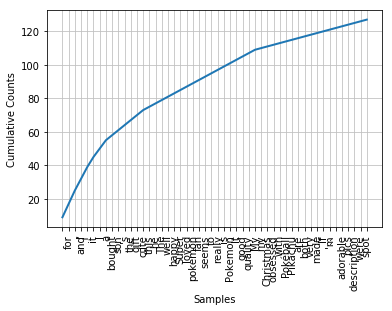

In [33]:
fdist1.plot(50, cumulative=True)

## 測試區

In [41]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
#斷詞function
def cut_text_list(textlist):
    textcutlist=[]
    for text in textlist:
        cutwords=jieba.cut(text)
        cuttext=" ".join([word for word in cutwords if word not in stopwords and '\u4e00' <= word <= '\u9fff'])
        textcutlist.append(cuttext)
    return textcutlist

In [42]:

#文字轉向量矩陣
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(pincutlist)
print('文字轉向量矩陣')

#向量矩陣做tfidf

tfidf_transformer=TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print('tfidf')


文字轉向量矩陣


In [ ]:
#ptt測試集|
with open('./data/foodptt.json') as f:
    testdatas=json.load(f)
docs_new=cut_text_list(testdatas)
X_new_counts= count_vect.transform(docs_new)
x_new_tfidf=tfidf_transformer.transform(X_new_counts)

#試用Roccio分群
# from sklearn.neighbors.nearest_centroid import NearestCentroid
st=time.time()
clf = NearestCentroid().fit(X_train_tfidf,stylelist)
predicted =clf.predict(x_new_tfidf)
print("Roccio")
pprint.pprint(predicted)
ed=time.time()
print(ed-st)


#試用bayes分群
# from sklearn.naive_bayes import MultinomialNB
st=time.time()
clf = MultinomialNB().fit(X_train_tfidf,stylelist)
predicted =clf.predict(x_new_tfidf)
print("bayes")
pprint.pprint(predicted)
ed=time.time()
print(ed-st)

#試用kmeans分群
# from sklearn.neighbors import KNeighborsClassifier
st=time.time()
clf = KNeighborsClassifier(15).fit(X_train_tfidf,stylelist)
predicted =clf.predict(x_new_tfidf)
print("Kmeans")
pprint.pprint(predicted)
ed=time.time()
print(ed-st)

#試用svm分群
# from sklearn import svm
st=time.time()
clf = svm.SVC(kernel="linear").fit(X_train_tfidf,stylelist)
predicted =clf.predict(x_new_tfidf)
print("svm")
pprint.pprint(predicted)
ed=time.time()
print(ed-st)